### Considering 24h_volume as a target column
 we will be moving forward with feature engineering

In [ ]:
# Imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [130]:
# load the dataset
df1 = pd.read_csv('../data/coin_gecko_2022-03-16.csv')
df2 = pd.read_csv('../data/coin_gecko_2022-03-17.csv')
df = pd.concat([df1, df2], ignore_index=True)
df['1h'].fillna(df['1h'].mode()[0], inplace=True)
df['24h'].fillna(df['24h'].mode()[0], inplace=True)
df['7d'].fillna(df['7d'].mode()[0], inplace=True)
df['24h_volume'].fillna(df['24h_volume'].mode()[0], inplace=True)
df.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        1000 non-null   object 
 1   symbol      1000 non-null   object 
 2   price       1000 non-null   float64
 3   1h          1000 non-null   float64
 4   24h         1000 non-null   float64
 5   7d          1000 non-null   float64
 6   24h_volume  1000 non-null   float64
 7   mkt_cap     1000 non-null   float64
 8   date        1000 non-null   object 
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


In [132]:
# Converting 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   coin        1000 non-null   object        
 1   symbol      1000 non-null   object        
 2   price       1000 non-null   float64       
 3   1h          1000 non-null   float64       
 4   24h         1000 non-null   float64       
 5   7d          1000 non-null   float64       
 6   24h_volume  1000 non-null   float64       
 7   mkt_cap     1000 non-null   float64       
 8   date        1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 70.4+ KB


In [133]:
df.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


In [134]:
df.coin.nunique()

506

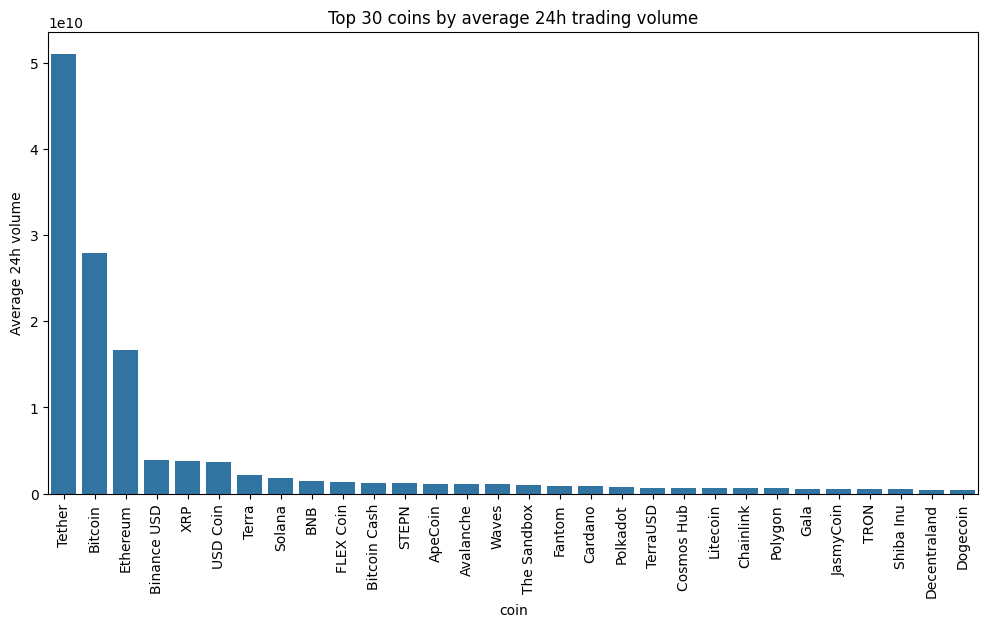

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean volume per coin (or you could use median)
mean_volume = df.groupby('coin')['24h_volume'].mean().reset_index()

# Sort descending
mean_volume_sorted = mean_volume.sort_values(by='24h_volume', ascending=False)

# Select top 20 coins (you can change this number)
top_n = 30
top_coins = mean_volume_sorted.head(top_n)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='coin', y='24h_volume', data=top_coins)
plt.title(f"Top {top_n} coins by average 24h trading volume")
plt.xticks(rotation=90)
plt.ylabel('Average 24h volume')
plt.show()


In [136]:
# From here we can see that coins column is categorical and also important for our analysis.
# We can also see that there are some coins with very low trading volume, which might not be relevant for liquidity prediction.
# We can also explore other features like 'price', 'market_cap', etc. in a similar way.
# This will help us understand the distribution of these features and their potential impact on liquidity.
# --- IGNORE --- the coins after top 10. Give them same encoding. 


top_n = 10

mean_volume = df.groupby('coin')['24h_volume'].mean().reset_index()
mean_volume_sorted = mean_volume.sort_values(by='24h_volume', ascending=False)
top_coins = mean_volume_sorted.head(top_n)['coin'].tolist()

print(f"Top {top_n} coins:", top_coins)

# Step 2: Create a grouped coin column
df['coin_grouped'] = df['coin'].apply(lambda x: x if x in top_coins else 'Other')

# Step 3: Label encode the grouped column
le = LabelEncoder()
df['coin_grouped_encoded'] = le.fit_transform(df['coin_grouped'])

# Optional: check the unique encoded labels
print(df[['coin_grouped', 'coin_grouped_encoded']].drop_duplicates())

# Step 4: Drop the original 'coin' column if you don't need it anymore
# df = df.drop(columns=['coin'])

Top 10 coins: ['Tether', 'Bitcoin', 'Ethereum', 'Binance USD', 'XRP', 'USD Coin', 'Terra', 'Solana', 'BNB', 'FLEX Coin']
    coin_grouped  coin_grouped_encoded
0        Bitcoin                     2
1       Ethereum                     3
2         Tether                     8
3            BNB                     0
4       USD Coin                     9
5            XRP                    10
6          Terra                     7
7         Solana                     6
8          Other                     5
11   Binance USD                     1
186    FLEX Coin                     4


**Other coins have encoded and 5**

Top 10 coins: ['Tether', 'Bitcoin', 'Ethereum', 'Binance USD', 'XRP', 'USD Coin', 'Terra', 'Solana', 'BNB', 'FLEX Coin']

    coin_grouped  coin_grouped_encoded

       Bitcoin                      2

       Ethereum                     3

       Tether                       8

       BNB                          0

       USD Coin                     9

       XRP                          10

       Terra                        7

       Solana                       6

       Other                        5

       Binance USD                  1

       FLEX Coin                    4

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   coin                  1000 non-null   object        
 1   symbol                1000 non-null   object        
 2   price                 1000 non-null   float64       
 3   1h                    1000 non-null   float64       
 4   24h                   1000 non-null   float64       
 5   7d                    1000 non-null   float64       
 6   24h_volume            1000 non-null   float64       
 7   mkt_cap               1000 non-null   float64       
 8   date                  1000 non-null   datetime64[ns]
 9   coin_grouped          1000 non-null   object        
 10  coin_grouped_encoded  1000 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 86.1+ KB


In [138]:
df.drop(columns=['coin', 'symbol'], inplace = True)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   price                 1000 non-null   float64       
 1   1h                    1000 non-null   float64       
 2   24h                   1000 non-null   float64       
 3   7d                    1000 non-null   float64       
 4   24h_volume            1000 non-null   float64       
 5   mkt_cap               1000 non-null   float64       
 6   date                  1000 non-null   datetime64[ns]
 7   coin_grouped          1000 non-null   object        
 8   coin_grouped_encoded  1000 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 70.4+ KB


In [140]:
df.drop(columns=['coin_grouped'], inplace=True)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   price                 1000 non-null   float64       
 1   1h                    1000 non-null   float64       
 2   24h                   1000 non-null   float64       
 3   7d                    1000 non-null   float64       
 4   24h_volume            1000 non-null   float64       
 5   mkt_cap               1000 non-null   float64       
 6   date                  1000 non-null   datetime64[ns]
 7   coin_grouped_encoded  1000 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 62.6 KB


<Axes: >

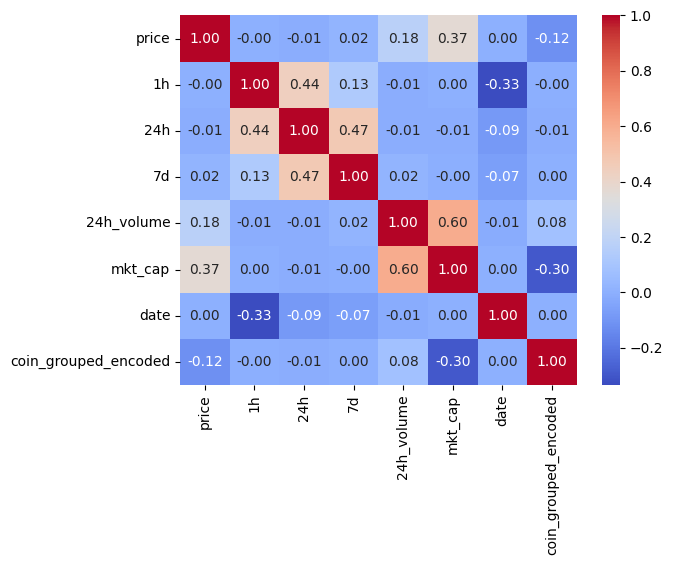

In [142]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

#### We have only two days data so date column will not help let's Drop it

In [143]:
df.drop('date', axis = 1, inplace = True)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 1000 non-null   float64
 1   1h                    1000 non-null   float64
 2   24h                   1000 non-null   float64
 3   7d                    1000 non-null   float64
 4   24h_volume            1000 non-null   float64
 5   mkt_cap               1000 non-null   float64
 6   coin_grouped_encoded  1000 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 54.8 KB


# Scaling

In [145]:
import numpy as np

df['price'] = np.log1p(df['price'])
df['24h_volume'] = np.log1p(df['24h_volume'])
df['mkt_cap'] = np.log1p(df['mkt_cap'])


In [146]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler

# Select features to scale
features_to_scale = ['price', '1h', '24h', '7d', 'mkt_cap', '24h_volume']

scaler = StandardScaler()
df_scaled = df.copy()

df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])


In [147]:
# df_scaled.drop('24h_volume', axis=1, inplace=True)
df_scaled.head()


,price,1h,24h,7d,24h_volume,mkt_cap,coin_grouped_encoded
0,4.270451,0.459752,0.108785,0.138270,3.114682,5.327438,2
1,2.994515,0.534278,0.176468,0.181985,2.900271,4.739038,3
2,-0.419282,-0.397299,-0.415764,-0.102162,3.295832,3.772307,8
3,2.065561,0.310700,0.074943,-0.084676,1.926437,3.619941,0
4,-0.419312,-0.397299,-0.398843,-0.102162,2.301454,3.479901,9


# Train Test Split

In [156]:
X = df_scaled.drop('24h_volume', axis=1)  # Assuming 'volume' is the target variable
y = df_scaled['24h_volume']
# y = np.log1p(y)  # Assuming '24h_volume' is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
df_scaled.isnull().sum()

price                   0
1h                      0
24h                     0
7d                      0
24h_volume              0
mkt_cap                 0
coin_grouped_encoded    0
dtype: int64

In [158]:
model = LinearRegression()
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.5854106918946812
R^2 Score: 0.2751537448156708


In [159]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
# features_to_use = ['log_price', '1h', '24h', '7d', 'log_mkt_cap', 'coin_grouped_encoded']

# X = df_scaled[features_to_use]
# y = np.log1p(df['target_volume'])  # log-transformed target

# # Drop last row with NaN if you used shift
# X = X.iloc[:-1]
# y = y.iloc[:-1]

# Train/test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'XGBoost': XGBRegressor(random_state=42, n_estimators=100)
}

results = []

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Evaluate in log space
    mse_log = mean_squared_error(y_test, y_pred)
    r2_log = r2_score(y_test, y_pred)
    
    # Evaluate in original scale
    y_test_real = np.expm1(y_test)
    y_pred_real = np.expm1(y_pred)
    mse_real = mean_squared_error(y_test_real, y_pred_real)
    r2_real = r2_score(y_test_real, y_pred_real)
    
    results.append({
        'Model': name,
        'MSE (log scale)': mse_log,
        'R2 (log scale)': r2_log,
        'MSE (real scale)': mse_real,
        'R2 (real scale)': r2_real
    })

# Convert to DataFrame for nice printing
results_df = pd.DataFrame(results)
print("\n=== Model comparison ===")
print(results_df.sort_values(by='R2 (real scale)', ascending=False))



=== Model comparison ===
               Model  MSE (log scale)  R2 (log scale)  MSE (real scale)  \
2            XGBoost         0.588308        0.271567          0.804833   
1      Random Forest         0.565693        0.299568          0.844487   
0  Linear Regression         0.585411        0.275154          0.893303   

   R2 (real scale)  
2         0.439945  
1         0.412352  
0         0.378382  


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Create base model
rf = RandomForestRegressor(random_state=42)

# Randomized search
search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,          # Number of parameter settings sampled (increase for more thorough search)
    scoring='r2',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1           # Use all CPU cores
)

# Fit search
search_rf.fit(X_train, y_train)

# Show best parameters and score
print("Best Parameters:", search_rf.best_params_)
print(f"Best R2 Score on CV: {search_rf.best_score_:.4f}")



Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}
Best R2 Score on CV: 0.4463


In [168]:
best_rf = search_rf.best_estimator_
best_rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,20
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [ ]:
y_pred = best_rf.predict(X_test)

# Remember: target was log-transformed
y_test_real = np.expm1(y_test)
y_pred_real = np.expm1(y_pred)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test_real, y_pred_real)
r2 = r2_score(y_test_real, y_pred_real)

print(f"MSE (real): {mse}")
print(f"R2 (real): {r2}")


MSE (real): 0.7554547441903101
R2 (real): 0.47430607629800314


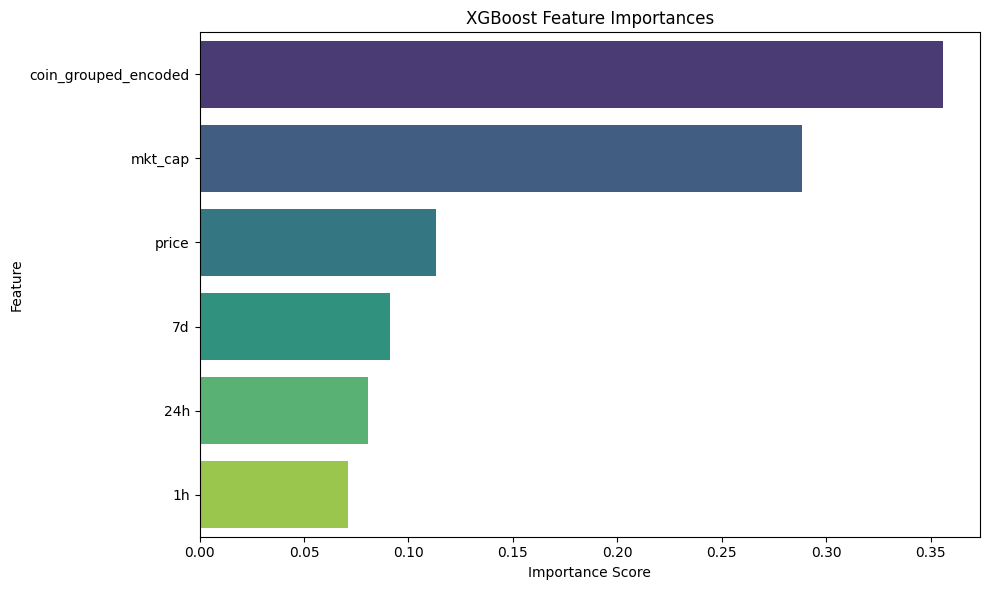

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = best_rf.feature_importances_
feature_names = X_train.columns

# Create DataFrame for nicer plotting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('XGBoost Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
